# Identifying Diseased Cotton Plant and Leaf with Deep Transfer Learning

In [1]:
# we will need these as we are using transfer learning and we will have to train our own last layer(s)
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Sequential, Model, load_model

# importing pre-trained modeland a fuction to pre-process our image
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

# for image data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [2]:
# usual imports
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

### Datasets
Cotton Disease Dataset:

https://drive.google.com/drive/folders/1vdr9CC9ChYVW2iXp6PlfyMOGD-4Um1ue

In [3]:
train_path = "Datasets/train"
valid_path = "Datasets/val"
test_path = "Datasets/test"

In [5]:
#useful for getting number of classes
folders = glob("Datasets/train/*")
folders

['Datasets/train\\diseased cotton leaf',
 'Datasets/train\\diseased cotton plant',
 'Datasets/train\\fresh cotton leaf',
 'Datasets/train\\fresh cotton plant']

### Downloading the pretrained Inception_v3 model with weights trained for ImageNet:

More Info.: https://keras.io/api/applications/

In [6]:
#resize all the images to this
image_size = [224, 224]

In [7]:
# we will not include last layer include_top=False
inception = InceptionV3(input_shape=image_size+[3], weights="imagenet", include_top=False)

In [9]:
#don't train existing weights
for layer in inception.layers:
    layer.trainable=False

### Model Construction

In [10]:
#our layers
x = Flatten()(inception.output)
# we can add more layers
# x = Dense(1000, activation="relu")(x)

In [11]:
prediction = Dense(len(folders), activation="softmax")(x)

In [12]:
#create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [13]:
#view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [14]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
#image_data_augmentation
train_datagen = ImageDataGenerator(rescale=1/255, shear_range=0.2,
                            zoom_range=0.2, horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1/255)

test_datagen = ImageDataGenerator(rescale=1/255)

training_set = train_datagen.flow_from_directory(train_path, batch_size=16,
                                                 target_size=(224, 224), class_mode="categorical")

validation_set = val_datagen.flow_from_directory(valid_path, batch_size=16,
                                                 target_size=(224, 224), class_mode="categorical")

test_set = test_datagen.flow_from_directory(test_path, batch_size=16,
                                                 target_size=(224, 224), class_mode="categorical")

Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [16]:
# fit the model
r = model.fit(training_set, validation_data=validation_set, epochs=10,
                        steps_per_epoch=len(training_set), validation_steps=len(validation_set))

Epoch 1/10
122/122 [==============================] - 152s 1s/step - loss: 2.0558 - accuracy: 0.7642 - val_loss: 0.9735 - val_accuracy: 0.8549
Epoch 2/10
122/122 [==============================] - 155s 1s/step - loss: 0.9348 - accuracy: 0.8821 - val_loss: 0.7001 - val_accuracy: 0.9074
Epoch 3/10
122/122 [==============================] - 176s 1s/step - loss: 0.9381 - accuracy: 0.8939 - val_loss: 0.9730 - val_accuracy: 0.8981
Epoch 4/10
122/122 [==============================] - 159s 1s/step - loss: 1.2594 - accuracy: 0.8893 - val_loss: 0.5070 - val_accuracy: 0.9414
Epoch 5/10
122/122 [==============================] - 152s 1s/step - loss: 0.9524 - accuracy: 0.9149 - val_loss: 1.0754 - val_accuracy: 0.9290
Epoch 6/10
122/122 [==============================] - 140s 1s/step - loss: 0.7012 - accuracy: 0.9411 - val_loss: 1.4776 - val_accuracy: 0.8642
Epoch 7/10
122/122 [==============================] - 141s 1s/step - loss: 0.7187 - accuracy: 0.9349 - val_loss: 0.7504 - val_accuracy: 0.9414

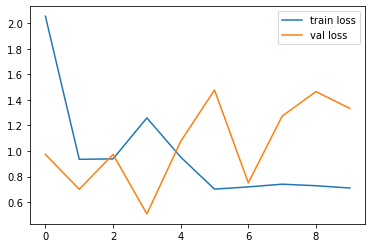

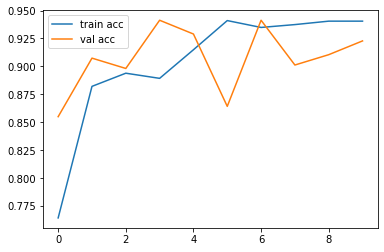

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [19]:
y_pred = model.predict(test_set)
y_pred[0:50]

array([[1.29247472e-20, 0.00000000e+00, 1.00000000e+00, 1.15922933e-36],
       [9.96821284e-01, 9.68237147e-23, 3.17875412e-03, 3.21005394e-23],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.41998966e-30],
       [2.17002594e-21, 4.24541239e-30, 7.03528808e-31, 1.00000000e+00],
       [1.00000000e+00, 2.45286062e-30, 3.13865220e-33, 1.49310912e-36],
       [1.19959623e-04, 1.72332476e-17, 9.99880075e-01, 1.42015044e-09],
       [7.82407329e-20, 1.15487046e-06, 3.80847166e-33, 9.99998808e-01],
       [7.41272064e-19, 4.38952833e-01, 4.44683165e-27, 5.61047077e-01],
       [1.17994855e-36, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.12111445e-13, 2.38943729e-03, 9.97610569e-01, 5.27583694e-18],
       [1.22637019e-07, 1.27293101e-08, 3.28580011e-03, 9.96714115e-01],
       [1.45332766e-22, 1.64351327e-14, 1.96277875e-32, 1.00000000e+00],
       [0.00000000e+00, 7.08518504e-26, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e

In [20]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[0:50]

array([2, 0, 1, 3, 0, 2, 3, 3, 1, 2, 3, 3, 3, 3, 1, 0, 1, 0], dtype=int64)

In [21]:
#save the model as a h5 file
model.save("cotton_disease_classification_inceptionv3.h5")

In [22]:
model=load_model("cotton_disease_classification_inceptionv3.h5")

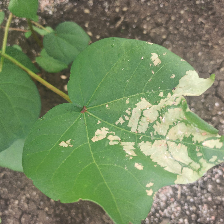

In [32]:
img=load_img('trial.jpg',target_size=(224,224))
img

In [33]:
x=img_to_array(img)
x.shape

(224, 224, 3)

In [34]:
x=x/255

In [35]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 224, 224, 3)

In [36]:
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [37]:
pred = model.predict(img_data)
pred

array([[9.9999988e-01, 1.0302132e-08, 4.2784731e-11, 1.6447609e-07]],
      dtype=float32)

In [38]:
pred_binary=np.argmax(pred, axis=1)
print(int(pred_binary))

0


In [41]:
def predict_covid(filepath):
    img=load_img(filepath, target_size=(224,224))
    x=img_to_array(img)
    x=x/255
    x=np.expand_dims(x,axis=0)
    img_data=preprocess_input(x)
    pred=model.predict(img_data)
    pred_binary=int(np.argmax(pred, axis=1))
    if pred_binary == 0:
        result = "diseased cotton leaf"
    if pred_binary == 1:
        result = "diseased cotton plant"    
    if pred_binary == 2:
        result = "fresh cotton leaf"
    if pred_binary == 3:
        result = "fresh cotton leaf"
    return result

In [42]:
filepath = 'trial.jpg'
prediction = predict_covid(filepath)
prediction

'diseased cotton leaf'